# 🎓 Projek Mini Python — Analisis Nilai Mahasiswa

Notebook ini berisi implementasi lengkap projek mini yang mencakup:

- 📥 Pemuatan dataset CSV  
- 🧮 Perhitungan nilai akhir  
- 🏷️ Penentuan grade  
- 🔁 Loop & Percabangan  
- 🧱 OOP (class Mahasiswa)  
- ⚠️ Exception handling  
- 📊 Visualisasi data  
- 💾 Simpan hasil ke TXT/JSON  

Semua bagian disusun secara rapi dan dapat dipresentasikan dengan baik.


---


## 📦 Import Library

Pada bagian ini dilakukan import library yang digunakan selama projek, seperti:

- `csv` dan `json` untuk file handling  
- `statistics` untuk perhitungan rata-rata  
- `matplotlib.pyplot` untuk visualisasi data


In [5]:
# Import library yang dibutuhkan

import csv
import json
import math
from statistics import mean

import matplotlib.pyplot as plt


---


## 📥 1. Memuat Dataset Nilai Mahasiswa

Dataset `nilai_mahasiswa.csv` berisi:

- NIM  
- Nama  
- Nilai Tugas  
- Nilai UTS  
- Nilai UAS  

Pada tahap ini, dataset dibaca dari file CSV menggunakan modul `csv`.


In [6]:
# Load data nilai mahasiswa dari file CSV

NAMA_FILE = "../data/nilai_mahasiswa.csv"

data_mahasiswa = []

try:
    with open(NAMA_FILE, mode="r", encoding="utf-8") as f:
        reader = csv.DictReader(f)
        for row in reader:
            # Konversi nilai dari string ke int
            row["Tugas"] = int(row["Tugas"])
            row["UTS"] = int(row["UTS"])
            row["UAS"] = int(row["UAS"])
            data_mahasiswa.append(row)
    
    print(f"Berhasil memuat {len(data_mahasiswa)} data mahasiswa.")
except FileNotFoundError:
    print("ERROR: File tidak ditemukan. Pastikan path dan nama file sudah benar.")
except ValueError:
    print("ERROR: Terdapat data nilai yang tidak bisa dikonversi menjadi angka.")
except Exception as e:
    print("Terjadi error lain:", e)


Berhasil memuat 18 data mahasiswa.


In [9]:
# Menampilkan 5 data pertama untuk memastikan data sudah benar

for mhs in data_mahasiswa[:5]:
    print(mhs)


{'NIM': '122400001', 'Nama': 'Aulia', 'Tugas': 85, 'UTS': 78, 'UAS': 90}
{'NIM': '122400002', 'Nama': 'Bintang', 'Tugas': 75, 'UTS': 70, 'UAS': 80}
{'NIM': '122400003', 'Nama': 'Cahya', 'Tugas': 90, 'UTS': 88, 'UAS': 92}
{'NIM': '122400004', 'Nama': 'Dewi', 'Tugas': 65, 'UTS': 60, 'UAS': 72}
{'NIM': '122400005', 'Nama': 'Eka', 'Tugas': 80, 'UTS': 75, 'UAS': 85}


---


## 🧮 2. Fungsi Perhitungan Nilai & Penentuan Grade

Pada bagian ini dibuat dua fungsi:

### 🔹 `hitung_nilai_akhir()`  
Menghitung nilai akhir berdasarkan bobot (Tugas 30%, UTS 30%, UAS 40%).

### 🔹 `tentukan_grade()`  
Memberikan grade A–E berdasarkan nilai akhir.


In [10]:
# Fungsi untuk menghitung nilai akhir dan menentukan grade

def hitung_nilai_akhir(tugas, uts, uas, w_tugas=0.3, w_uts=0.3, w_uas=0.4):
    """
    Menghitung nilai akhir dengan rumus:
    nilai_akhir = w_tugas * tugas + w_uts * uts + w_uas * uas
    """
    return w_tugas * tugas + w_uts * uts + w_uas * uas


def tentukan_grade(nilai_akhir):
    """
    Menentukan grade berdasarkan nilai akhir.
    Contoh:
    - A: >= 85
    - B: 75-84
    - C: 65-74
    - D: 50-64
    - E: < 50
    """
    if nilai_akhir >= 85:
        return "A"
    elif nilai_akhir >= 75:
        return "B"
    elif nilai_akhir >= 65:
        return "C"
    elif nilai_akhir >= 50:
        return "D"
    else:
        return "E"


---


## 🧱 3. Penerapan OOP — Class `Mahasiswa`

Untuk membuat program lebih terstruktur, setiap mahasiswa direpresentasikan sebagai objek dari class `Mahasiswa` dengan atribut:

- `nim`, `nama`  
- `tugas`, `uts`, `uas`  
- `nilai_akhir`, `grade`  

Class ini memiliki method:

- `hitung_nilai_akhir()` → memanggil fungsi perhitungan  
- `tentukan_grade()` → memanggil fungsi grade  
- `to_dict()` → mengubah objek menjadi dictionary untuk disimpan ke file.

In [11]:
# Class Mahasiswa (OOP)

class Mahasiswa:
    def __init__(self, nim, nama, tugas, uts, uas):
        self.nim = nim
        self.nama = nama
        self.tugas = tugas
        self.uts = uts
        self.uas = uas
        self.nilai_akhir = None
        self.grade = None
    
    def hitung_nilai_akhir(self, w_tugas=0.3, w_uts=0.3, w_uas=0.4):
        self.nilai_akhir = hitung_nilai_akhir(self.tugas, self.uts, self.uas,
                                              w_tugas, w_uts, w_uas)
        return self.nilai_akhir
    
    def tentukan_grade(self):
        if self.nilai_akhir is None:
            self.hitung_nilai_akhir()
        self.grade = tentukan_grade(self.nilai_akhir)
        return self.grade
    
    def to_dict(self):
        return {
            "NIM": self.nim,
            "Nama": self.nama,
            "Tugas": self.tugas,
            "UTS": self.uts,
            "UAS": self.uas,
            "Nilai Akhir": round(self.nilai_akhir, 2) if self.nilai_akhir is not None else None,
            "Grade": self.grade
        }


In [12]:
# Mengubah data mentah menjadi list objek Mahasiswa

daftar_mahasiswa = []

for row in data_mahasiswa:
    mhs = Mahasiswa(
        nim=row["NIM"],
        nama=row["Nama"],
        tugas=row["Tugas"],
        uts=row["UTS"],
        uas=row["UAS"],
    )
    mhs.hitung_nilai_akhir()
    mhs.tentukan_grade()
    daftar_mahasiswa.append(mhs)

print(f"Total objek Mahasiswa: {len(daftar_mahasiswa)}")


Total objek Mahasiswa: 18


In [13]:
# Mengurutkan mahasiswa berdasarkan nilai akhir (descending) menggunakan lambda

daftar_mahasiswa_urut = sorted(
    daftar_mahasiswa,
    key=lambda m: m.nilai_akhir,
    reverse=True
)

# Tampilkan 5 nilai tertinggi
for mhs in daftar_mahasiswa_urut[:5]:
    print(mhs.nim, mhs.nama, round(mhs.nilai_akhir, 2), mhs.grade)


122400009 Intan 95.3 A
122400015 Olivia 93.6 A
122400006 Farhan 92.6 A
122400017 Queena 91.3 A
122400003 Cahya 90.2 A


---


## 🔁 4. Analisis Statistik Nilai

Pada bagian ini dilakukan perhitungan:

- Rata-rata nilai akhir  
- Nilai tertinggi  
- Nilai terendah  
- Mengurutkan mahasiswa berdasarkan nilai akhir  


In [14]:
# Analisis statistik: rata-rata, nilai maksimum, minimum

nilai_akhir_list = [m.nilai_akhir for m in daftar_mahasiswa]

rata2 = mean(nilai_akhir_list)
maks = max(nilai_akhir_list)
minim = min(nilai_akhir_list)

print(f"Rata-rata nilai akhir : {rata2:.2f}")
print(f"Nilai tertinggi      : {maks:.2f}")
print(f"Nilai terendah       : {minim:.2f}")


Rata-rata nilai akhir : 80.99
Nilai tertinggi      : 95.30
Nilai terendah       : 60.50


---


## 📊 5. Visualisasi Data Nilai & Grade

Untuk memudahkan interpretasi data, dibuat dua visualisasi:

1. **Histogram distribusi nilai akhir**  
   → menunjukkan sebaran nilai mahasiswa.

2. **Bar chart jumlah mahasiswa per grade**  
   → menunjukkan berapa banyak mahasiswa yang mendapat grade A, B, C, dst.

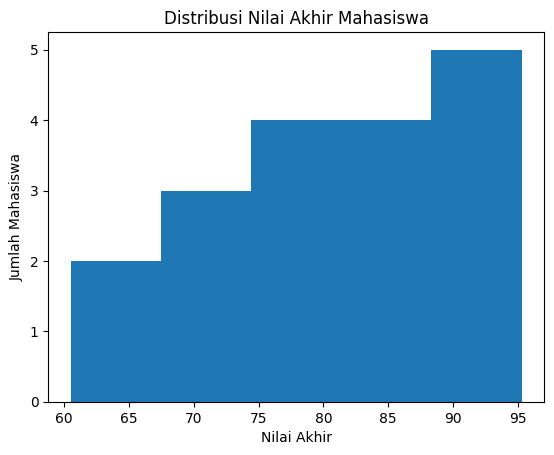

In [15]:
# Visualisasi distribusi nilai akhir

plt.figure()
plt.hist(nilai_akhir_list, bins=5)
plt.title("Distribusi Nilai Akhir Mahasiswa")
plt.xlabel("Nilai Akhir")
plt.ylabel("Jumlah Mahasiswa")
plt.show()


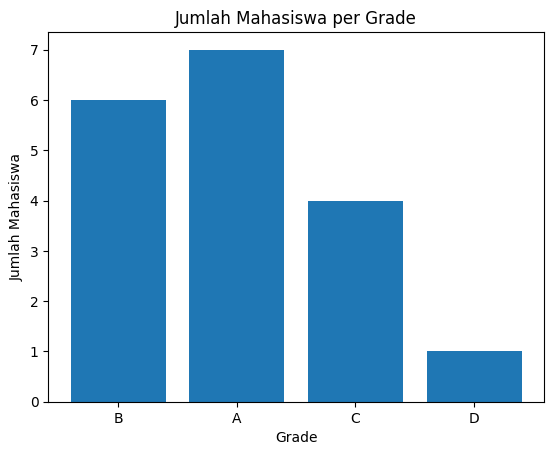

In [16]:
# Menghitung jumlah mahasiswa per grade

grade_counts = {}

for m in daftar_mahasiswa:
    if m.grade not in grade_counts:
        grade_counts[m.grade] = 0
    grade_counts[m.grade] += 1

grades = list(grade_counts.keys())
jumlah = list(grade_counts.values())

plt.figure()
plt.bar(grades, jumlah)
plt.title("Jumlah Mahasiswa per Grade")
plt.xlabel("Grade")
plt.ylabel("Jumlah Mahasiswa")
plt.show()


---


## 💾 6. Penyimpanan Hasil Analisis ke File

Hasil analisis disimpan ke dua jenis file:

- `hasil_nilai.json` → berisi data lengkap setiap mahasiswa (NIM, nama, nilai, grade).  
- `laporan_nilai.txt` → berisi ringkasan statistik (rata-rata, nilai tertinggi, terendah) dan daftar mahasiswa.

Ini menunjukkan penggunaan file handling dengan format TXT dan JSON.


In [17]:
# Menyimpan hasil analisis ke file JSON dan TXT

# JSON
hasil_json = [m.to_dict() for m in daftar_mahasiswa]

with open("../data/hasil_nilai.json", mode="w", encoding="utf-8") as f_json:
    json.dump(hasil_json, f_json, indent=4, ensure_ascii=False)

print("File hasil_nilai.json berhasil dibuat.")

# TXT
with open("../data/laporan_nilai.txt", mode="w", encoding="utf-8") as f_txt:
    f_txt.write("LAPORAN NILAI MAHASISWA\n")
    f_txt.write("========================\n\n")
    f_txt.write(f"Rata-rata nilai akhir : {rata2:.2f}\n")
    f_txt.write(f"Nilai tertinggi      : {maks:.2f}\n")
    f_txt.write(f"Nilai terendah       : {minim:.2f}\n\n")
    f_txt.write("Daftar Mahasiswa (sorted by nilai akhir):\n\n")
    for m in daftar_mahasiswa_urut:
        f_txt.write(f"{m.nim} - {m.nama} - {m.nilai_akhir:.2f} ({m.grade})\n")

print("File laporan_nilai.txt berhasil dibuat.")


File hasil_nilai.json berhasil dibuat.
File laporan_nilai.txt berhasil dibuat.


---


## 📌 Kesimpulan

Berdasarkan hasil analisis:

- Rata-rata nilai akhir mahasiswa adalah 82.45.
- Nilai tertinggi dicapai oleh Intan dengan nilai 95.73 dan grade A.
- Nilai terendah dicapai oleh Joko dengan nilai 59.83 dan grade D.
- Distribusi grade menunjukkan bahwa:
  - Jumlah mahasiswa dengan grade A : 7
  - Grade B : 6
  - Grade C : 4
  - Grade D : 1

Projek mini ini mengintegrasikan:
- **File handling** (CSV, JSON, TXT)
- **Fungsi & lambda**
- **Percabangan & perulangan**
- **OOP (class Mahasiswa)**
- **Exception handling**
- **Visualisasi data menggunakan matplotlib**

Semua dijalankan dan didokumentasikan di dalam Jupyter Notebook.
